In [6]:
using GynC

#scalings = [2.0 ^ (i * 5/15) for i in -15:12]
#cs = map(x->Config(propvar=x*GynC.defaultpropvar), scalings)

#cs = Config[Config(Lausanne(p), propvar=1/8*GynC.defaultpropvar, adapt=true, thin=100) for p in 1:55]

cs = Config[Config(Lausanne(p), propvar=GynC.uniformpropvar(v), adapt=true, thin=100) for p in 1:5, v in [0.1, 0.01, 0.001]][:]

paths = map(c->joinpath("/nfs/datanumerik/bzfsikor/batch/",GynC.filename(c)), cs)

ss = map(GynC.load, paths)
ss = filter(s->s.config.patient.id=="l1",ss)

3-element Array{GynC.Sampling,1}:
 Sampling
  samples: (300000,116)
  uniques: 32748
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 1.0 x default trace, 0.009950330853168092 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}                  
 Sampling
  samples: (300000,116)
  uniques: 36260
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 0.010049414618355118 x default trace, 9.999500033329732e-5 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNo

In [7]:
import Mamba.Chains
function Mamba.Chains(ss::Vector{GynC.Sampling}; burnin=0)
    ml = minimum([size(s.samples,1) for s in ss])
    samples = cat(3, [s.samples[burnin+1:ml, :] for s in ss]...)
    thin = ss[1].config.thin
    @assert all(thin .== [s.config.thin for s in ss])
    Mamba.Chains(samples, thin=ss[1].config.thin, start=thin*(burnin+1))
end
Mamba.Chains(s::GynC.Sampling) = Mamba.Chains([s])

Object of type "Mamba.Chains"

Iterations = 100100:25000000
Thinning interval = 100
Chains = 1,2,3
Samples per chain = 249000

249000x116x3 Array{Float64,3}:
[:, :, 1] =
  4698.16   9888.32  184.327  2.97576  …  5.50262e-5  1.53372e-5  29.7843
  4670.28   9464.74  180.202  3.08766     6.05924e-5  1.46112e-5  29.4688
  4589.55  10073.7   182.884  3.13261     5.8571e-5   1.35434e-5  29.4364
  4566.13  10120.7   182.424  3.15205     5.46224e-5  1.37568e-5  29.9296
  4484.77  10536.8   185.391  3.33307     5.24452e-5  1.3408e-5   29.9218
  4390.83  10689.6   180.335  3.3714   …  5.16556e-5  1.35687e-5  30.2726
  4390.83  10689.6   180.335  3.3714      5.16556e-5  1.35687e-5  30.2726
  4366.24  10580.5   180.406  3.3752      5.19254e-5  1.30908e-5  30.4879
  4366.24  10580.5   180.406  3.3752      5.19254e-5  1.30908e-5  30.4879
  4366.24  10580.5   180.406  3.3752      5.19254e-5  1.30908e-5  30.4879
  4366.24  10580.5   180.406  3.3752   …  5.19254e-5  1.30908e-5  30.4879
  4380.51  10961


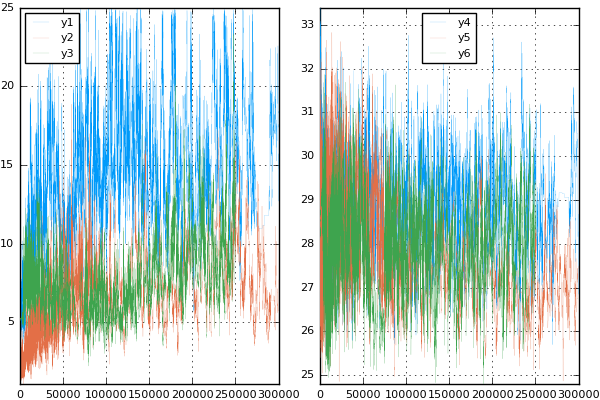

In [19]:
burnins = [1,10,100,1000,10000,50000,10000,50000, 100000, 200000]
species = [1,8,83,116]

Plots.plot(layout=length(species))
for (i,spec) in enumerate(species)
    Plots.plot!([s.samples[:,spec] for s in ss], width=0.1, subplot=i, label=spec)
end
Plots.plot!()

In [38]:
f = vcat([Mamba.gelmandiag(Chains(ss, burnin=burnin)).value[species,1] for burnin = burnins]'...)

10x4 Array{Float64,2}:
 1.248  2.232  1.057  1.249
 1.248  2.232  1.057  1.249
 1.249  2.234  1.057  1.249
 1.255  2.247  1.057  1.248
 1.284  2.354  1.055  1.259
 1.216  2.397  1.063  1.38 
 1.284  2.354  1.055  1.259
 1.216  2.397  1.063  1.38 
 1.111  2.454  1.066  1.503
 1.078  2.166  1.086  1.769


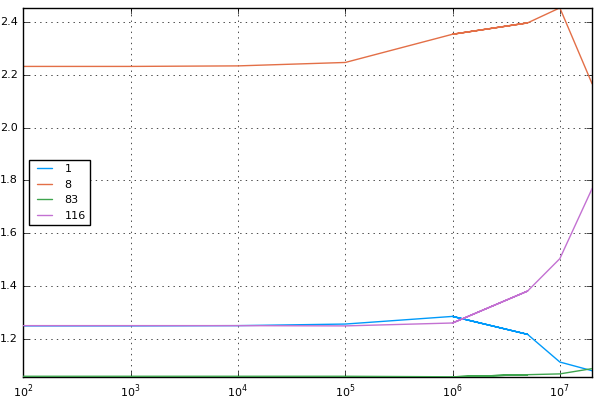

In [59]:
Plots.plot(burnins*100, f, xaxis=:log10,  label=species')

In [56]:
Base.size(s::GynC.Sampling, i) = size(s.samples, i)

size (generic function with 123 methods)

In [61]:
plotsolutions(ss[1][1:1000:end,:], t=0:1/3:60)

LoadError: LoadError: InterruptException:
while loading In[61], in expression starting on line 1

In [70]:
map(ss) do s
  s.variate.tune.SigmaLm |> show
end

[0.0029387743118179334 0.000472967115387135 -0.0003347571003629391 0.017046461445832925 0.004627273973894697 0.005848235868769094 0.002068302429173622 0.007173059855432094 -0.0023749099177586865 0.01212958355323034 0.006907449984305605 -0.004834100785674335 0.004320763991322294 0.01089779070408399 0.0063396200589804184 -0.003802813750851209 0.006885988471170694 -0.00424743051938707 0.010327203125240209 0.008567059043490817 0.02192636877126075 -0.0035580952127910377 0.008690127713344134 0.004447180502271309 0.015065469631235192 -0.004034551741404895 0.00594545517186528 -0.004018776385808519 0.006013062918215645 -0.002725513018163696 -0.0017408171342208408 0.015313201945682977 0.004788104753139744 0.003789673648212689 -0.003492837318083837 -0.010677379499642198 0.005300225098390076 0.0015566638435174076 0.002306995010454199 0.013644959517407339 0.005641584220884365 -0.008132541429406361 0.0040342391730514675 0.0005999470175693249 0.005868311827261432 0.0058208244561353106 0.0477389010379

3-element Array{Void,1}:
 nothing
 nothing
 nothing